In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

In [2]:
flipkart = pd.read_csv('Dataset-SA.csv')

In [3]:
flipkart

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [4]:
flipkart['product_name'].unique()

array(['Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)',
       'Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)',
       'MAHARAJA WHITELINE 65 L Desert Air Cooler??????(White, Grey, Rambo Grey / AC-303)',
       'Crompton 75 L Desert Air Cooler??????(White, Teal, ACGC-DAC751)',
       'boAt Rockerz 510 Super Extra Bass Bluetooth Headset??????(Molten Orange, On the Ear)',
       'Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neckband Bluetooth Headset??????(Green, In the Ear)',
       'OnePlus Bullets Wireless Z2 with Fast Charge, 30 Hrs Battery Life, Earphones with mic Bluetooth Headset??????(Magico Black, In the Ear)',
       'OnePlus Bullets Wireless Z2 Bluetooth Headset??????(Acoustic Red, In the Ear)',
       'Mivi Roam2 5 W Bluetooth Speaker??????(Black, Mono Channel)',
       'etmax NANO BLACK 30 W Bluetooth Home Theatre??????(Black, Stereo Channel)',
       'Mivi Fort S16 Soundbar w

In [5]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [6]:
flipkart.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [7]:
flipkart['Review'].nunique()

1324

In [8]:
flipkart.dropna(inplace = True)

In [9]:
flipkart.reset_index(drop=True,inplace=True)

In [10]:
flipkart.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [11]:
flipkart.drop(['product_name','product_price'],axis=1,inplace=True)

In [12]:
flipkart.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


# Remove space

In [13]:
def remove_space(Review):
    temp_lst = []
    Review = ''.join(Review.split())
    temp_lst.append(Review)
    return temp_lst

In [14]:
flipkart['Review'].apply(remove_space)

0                  [super!]
1                 [awesome]
2                    [fair]
3          [uselessproduct]
4                    [fair]
                ...        
180374           [mustbuy!]
180375             [super!]
180376               [nice]
180377           [justwow!]
180378    [value-for-money]
Name: Review, Length: 180379, dtype: object

In [15]:
flipkart['Review'] = flipkart['Review'].apply(remove_space)

In [16]:
flipkart.head()

,Rate,Review,Summary,Sentiment
0,5,[super!],great cooler excellent air flow and for this p...,positive
1,5,[awesome],best budget 2 fit cooler nice cooling,positive
2,3,[fair],the quality is good but the power of air is de...,positive
3,1,[uselessproduct],very bad product its a only a fan,negative
4,3,[fair],ok ok product,neutral


In [17]:
flipkart['Rate'] = flipkart['Rate'].apply(lambda rate:list(rate))

In [18]:
flipkart['Summary'] = flipkart['Summary'].apply(lambda summary:summary.split())

In [19]:
flipkart['Tags'] = flipkart['Rate'] + flipkart['Review'] + flipkart['Summary']

In [20]:
flipkart.head()

,Rate,Review,Summary,Sentiment,Tags
0,[5],[super!],"[great, cooler, excellent, air, flow, and, for...",positive,"[5, super!, great, cooler, excellent, air, flo..."
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cooling]",positive,"[5, awesome, best, budget, 2, fit, cooler, nic..."
2,[3],[fair],"[the, quality, is, good, but, the, power, of, ...",positive,"[3, fair, the, quality, is, good, but, the, po..."
3,[1],[uselessproduct],"[very, bad, product, its, a, only, a, fan]",negative,"[1, uselessproduct, very, bad, product, its, a..."
4,[3],[fair],"[ok, ok, product]",neutral,"[3, fair, ok, ok, product]"


In [21]:
flipkart_tags = flipkart[['Tags','Sentiment']]

In [22]:
flipkart_tags.head()

,Tags,Sentiment
0,"[5, super!, great, cooler, excellent, air, flo...",positive
1,"[5, awesome, best, budget, 2, fit, cooler, nic...",positive
2,"[3, fair, the, quality, is, good, but, the, po...",positive
3,"[1, uselessproduct, very, bad, product, its, a...",negative
4,"[3, fair, ok, ok, product]",neutral


# Porter stemming

In [23]:
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

In [24]:
def stemming_words(items):
    temp_lst = []
    for word in items:
        temp_lst.append(stemming.stem(word))
    temp_lst = list(set(temp_lst))
    return temp_lst

In [25]:
flipkart_tags['Tags'].apply(stemming_words)

0         [excel, unbelievablejust, air, cooler, thi, it...
1         [awesom, cooler, best, 2, cool, budget, 5, nic...
2         [the, decent, fair, 3, is, qualiti, power, but...
3         [veri, it, uselessproduct, product, bad, 1, fa...
4                                    [fair, ok, 3, product]
                                ...                        
180374                         [mustbuy!, 5, good, product]
180375                                    [nice, 5, super!]
180376                 [fast, deliveri, veri, 3, and, nice]
180377                       [product, 5, awesom, justwow!]
180378    [bowl, not, veri, in, small, soup, disappointm...
Name: Tags, Length: 180379, dtype: object

In [26]:
flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(lambda tag:' '.join(tag))

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_11768\801892176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(lambda tag:' '.join(tag))


In [27]:
flipkart_tags

,Tags,Sentiment
0,5 super! great cooler excellent air flow and f...,positive
1,5 awesome best budget 2 fit cooler nice cooling,positive
2,3 fair the quality is good but the power of ai...,positive
3,1 uselessproduct very bad product its a only a...,negative
4,3 fair ok ok product,neutral
...,...,...
180374,5 mustbuy! good product,positive
180375,5 super! nice,positive
180376,3 nice very nice and fast delivery,positive
180377,5 justwow! awesome product,positive


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500,stop_words='english')

In [29]:
cv.fit(flipkart_tags['Tags'])

CountVectorizer(max_features=500, stop_words='english')

In [30]:
review_matrix = cv.transform(flipkart_tags['Tags']).toarray()

In [31]:
X = review_matrix
Y = flipkart_tags['Sentiment']

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [33]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [35]:
classifier.fit(X_train,Y_train)

MultinomialNB()

In [36]:
classifier.predict(X_test)

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [37]:
Y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(Y_pred,Y_test))

[[ 4098   384   485]
 [  168   517   389]
 [  621   830 28584]]


<Axes: >

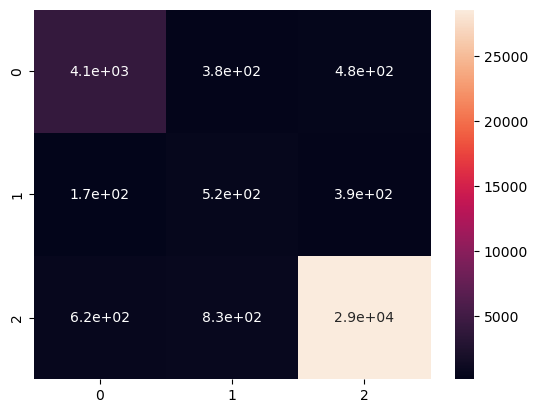

In [40]:
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True)

In [41]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.83      4967
     neutral       0.30      0.48      0.37      1074
    positive       0.97      0.95      0.96     30035

    accuracy                           0.92     36076
   macro avg       0.70      0.75      0.72     36076
weighted avg       0.93      0.92      0.93     36076



In [42]:
pickle.dump(classifier, open('Flipkart_review_model.sav', 'wb'))

In [43]:
joblib.dump(cv,'Vector_matrix.joblib')

['Vector_matrix.joblib']